In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
train_df = pd.read_csv('train.csv')
center_info_df = pd.read_csv('fulfilment_center_info.csv')
meal_info_df = pd.read_csv('meal_info.csv')
merged_df = pd.merge(train_df, center_info_df, on='center_id', how='left')
merged_df = pd.merge(merged_df, meal_info_df, on='meal_id', how='left')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

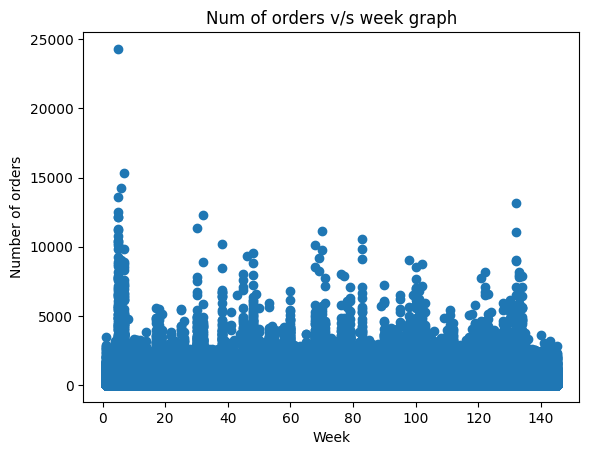

In [3]:
merged_df.info()
plt.scatter(merged_df['week'], merged_df['num_orders'])
# plt.hexbin(merged_df['week'], merged_df['num_orders'], gridsize=500)
plt.xlabel('Week')
plt.ylabel('Number of orders')
plt.title('Num of orders v/s week graph')
merged_df.isnull().sum() #No removal of features required or fill the missing as there are no missing values

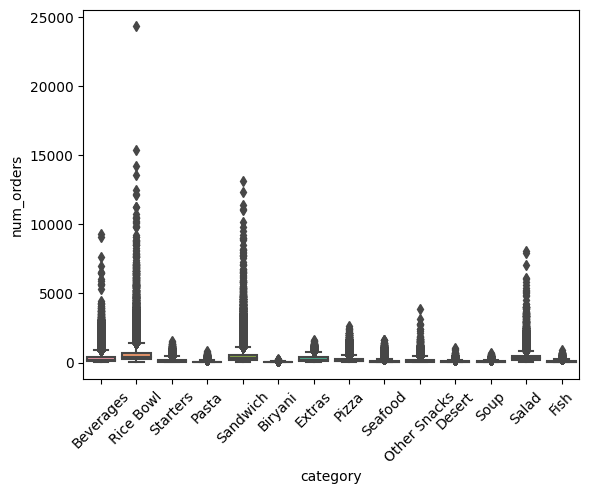

In [4]:
columns_to_check = ['checkout_price', 'num_orders']
z_scores = stats.zscore(merged_df[columns_to_check])
threshold = 25
outlier_mask = (z_scores > threshold).any(axis=1)
df_cleaned = merged_df[~outlier_mask]
sns.boxplot(x='category', y='num_orders', data=merged_df)
plt.xticks(rotation=45)
plt.show()

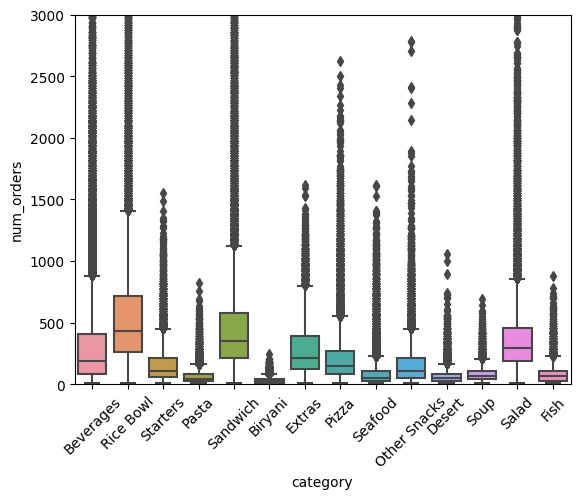

In [ ]:
sns.boxplot(x='category', y='num_orders', data=df_cleaned)
plt.xticks(rotation=45)
plt.ylim(0,3000)
plt.show()

<ipython-input-7-312b00103985>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


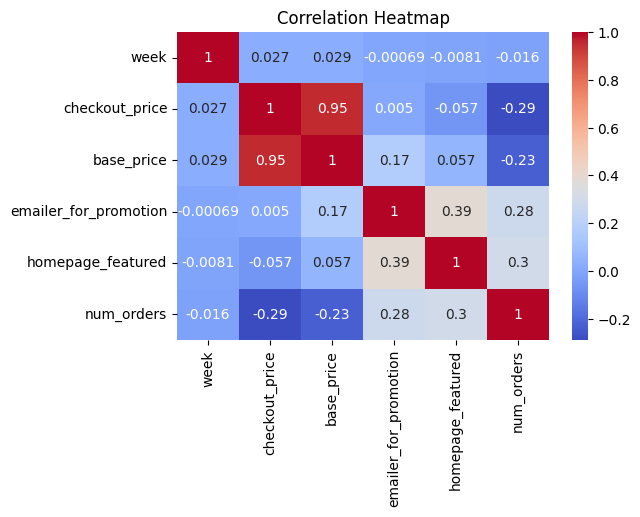

In [ ]:
correlation_matrix = df_cleaned.corr()
features_to_remove = ['id',"center_id","meal_id","city_code","region_code","op_area"]
correlation_matrix = correlation_matrix.drop(index=features_to_remove, columns=features_to_remove)
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

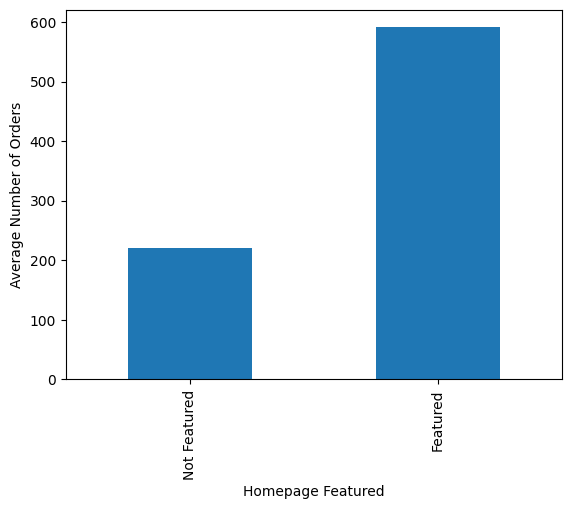

In [ ]:
average_orders_by_featured = df_cleaned.groupby('homepage_featured')['num_orders'].mean()
average_orders_by_featured.plot(kind='bar')
plt.xlabel('Homepage Featured')
plt.ylabel('Average Number of Orders')
plt.xticks(average_orders_by_featured.index, ['Not Featured', 'Featured'])
plt.show()

In [ ]:
print("The Shape of Cleaned dataset :",df_cleaned.shape)

The Shape of Cleaned dataset : (456528, 15)


In [ ]:
import plotly.express as px
center_orders = df_cleaned.groupby("center_id", as_index=False).sum()
center_orders = center_orders[["center_id", "num_orders"]].sort_values(by="num_orders", ascending=False).head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    x=center_orders["center_id"].astype("str"),
    y=center_orders["num_orders"],
    title="Top 10 Centers by Order",
    labels={"x": "Center ID", "y": "Total Orders"}
)
fig.show()

<ipython-input-10-fe435960e63d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  center_orders = df_cleaned.groupby("center_id", as_index=False).sum()


In [9]:
import plotly.express as px

# Assuming df_cleaned is your DataFrame
center_orders = df_cleaned.groupby("center_id", as_index=False).sum()
center_orders = center_orders[["center_id", "num_orders"]].sort_values(by="num_orders", ascending=False).head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    x=center_orders["center_id"].astype("str"),
    y=center_orders["num_orders"],
    title="Top 10 Centers by Order",
    labels={"x": "Center ID", "y": "Total Orders"}
)

fig.update_xaxes(tickfont=dict(size=20))
fig.update_yaxes(tickfont=dict(size=20))
# Adjust font size of row and column labels
fig.update_xaxes(title_text="Center ID", title_font=dict(size=25))
fig.update_yaxes(title_text="Total Orders", title_font=dict(size=25))

fig.show()

<ipython-input-9-92c00f81d09c>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
fig = px.pie(
    values=df_cleaned["category"].value_counts(),
    names=df_cleaned["category"].unique(),
    title="Most Popular Food Category"
)
fig.show()

In [ ]:
# Calculate total orders for each cuisine and sort them by order count
cuisine_orders = df_cleaned.groupby(["cuisine"], as_index=False).sum()
cuisine_orders = cuisine_orders[["cuisine", "num_orders"]].sort_values(by="num_orders", ascending=False)

# Create a bar plot to visualize orders by cuisine
fig = px.bar(cuisine_orders, x="cuisine", y="num_orders", title="Orders by Cuisine")
fig.show()


<ipython-input-12-32b9650be1ec>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
train_sample = df_cleaned.sample(frac=0.2)

# Create a scatter plot to visualize the relationship between checkout price and number of orders
fig = px.scatter(
    train_sample,
    x="checkout_price",
    y="num_orders",
    title="Number of Orders vs Checkout Price"
)
fig.show()


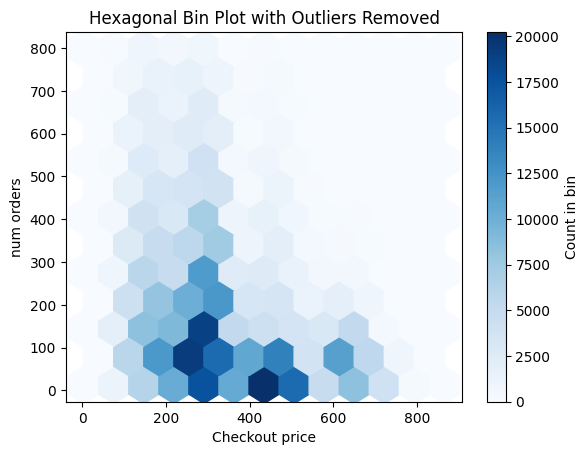

In [ ]:
import seaborn as sns
import numpy as np


x = merged_df['checkout_price']
y = merged_df['num_orders']

y_threshold_max = 800   # Set your desired maximum y-axis threshold

# Filter the data to remove outliers
filtered_x = x[(y <= y_threshold_max)]
filtered_y = y[(y <= y_threshold_max)]

# Create a hexagonal bin plot with filtered data
plt.hexbin(filtered_x, filtered_y, gridsize=12, cmap='Blues')
plt.xlabel('Checkout price')
plt.ylabel('num orders')
plt.title('Hexagonal Bin Plot with Outliers Removed')

plt.colorbar(label='Count in bin')
plt.show()






In [ ]:
import plotly.express as px

# Calculate total orders for each week
week_orders = df_cleaned.groupby(["week"], as_index=False).sum()
week_orders = week_orders[["week", "num_orders"]]

# Create a line plot to visualize the weekly order trend
fig = px.line(
    week_orders,
    x="week",
    y="num_orders",
    markers=True,
    title="Weekly Order Trend"
)
fig.show()


<ipython-input-15-ea322bcd2d0a>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

